In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc)



In [2]:
# 2. Load data
print("Loading breast cancer dataset...")
data = load_breast_cancer()
X = data.data
y = data.target
print(f"Dataset shape: {X.shape}")
print(f"Classes: {np.unique(y)}")


Loading breast cancer dataset...
Dataset shape: (569, 30)
Classes: [0 1]


In [3]:
# 3. Split data with stratification
print("\nSplitting data with stratification...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
print(f"Train class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")



Splitting data with stratification...
Training set: (455, 30), Test set: (114, 30)
Train class distribution: [170 285]
Test class distribution: [42 72]


In [4]:
# 4. Scale features
print("\nScaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Scaling features...


In [5]:
# 5. Define AdaBoost model with Decision Tree stumps
print("\nDefining AdaBoost model...")
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
ada_boost = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=0.5,
    random_state=42
)



Defining AdaBoost model...


In [6]:
# 6. Train the model
ada_boost.fit(X_train_scaled, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   learning_rate=0.5, random_state=42)

In [7]:
# 7. Evaluate on test set
print("\n" + "="*50)
print("EVALUATION METRICS")
print("="*50)



EVALUATION METRICS


In [8]:
y_pred = ada_boost.predict(X_test_scaled)
y_pred_proba = ada_boost.predict_proba(X_test_scaled)[:, 1]


In [9]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)


In [10]:
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")


Accuracy:  0.9561
Precision: 0.9467
Recall:    0.9861
F1-Score:  0.9660
ROC AUC:   0.9845


In [11]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"TN: {cm[0,0]}, FP: {cm[0,1]}, FN: {cm[1,0]}, TP: {cm[1,1]}")



Confusion Matrix:
[[38  4]
 [ 1 71]]
TN: 38, FP: 4, FN: 1, TP: 71


In [12]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))



Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [13]:
# 8. Plot ROC curve
print("\nGenerating ROC curve...")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_plot = auc(fpr, tpr)



Generating ROC curve...


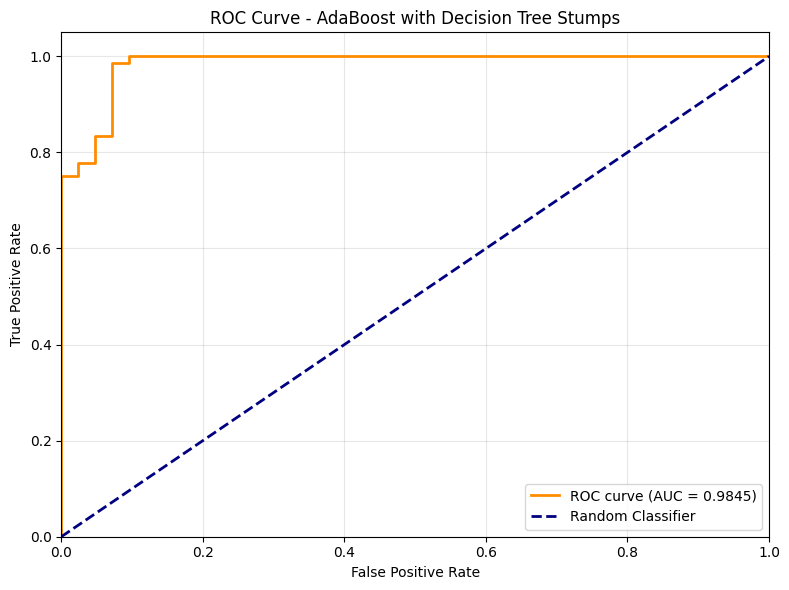

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_plot:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost with Decision Tree Stumps')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [15]:
print("\nProgram completed successfully!")


Program completed successfully!
